In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('/content/drive/MyDrive/pic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/pic/test.csv')

In [4]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [5]:
test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15035,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,15036,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,15037,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,15038,20150415T000000,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,15039,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [6]:
train['date'] = train['date'].apply(lambda x: x[:6]).astype(int)
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [7]:
y = train['price']

del train['price']
del train['id']

In [8]:
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)

del test['id']

In [9]:
print(y)

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64


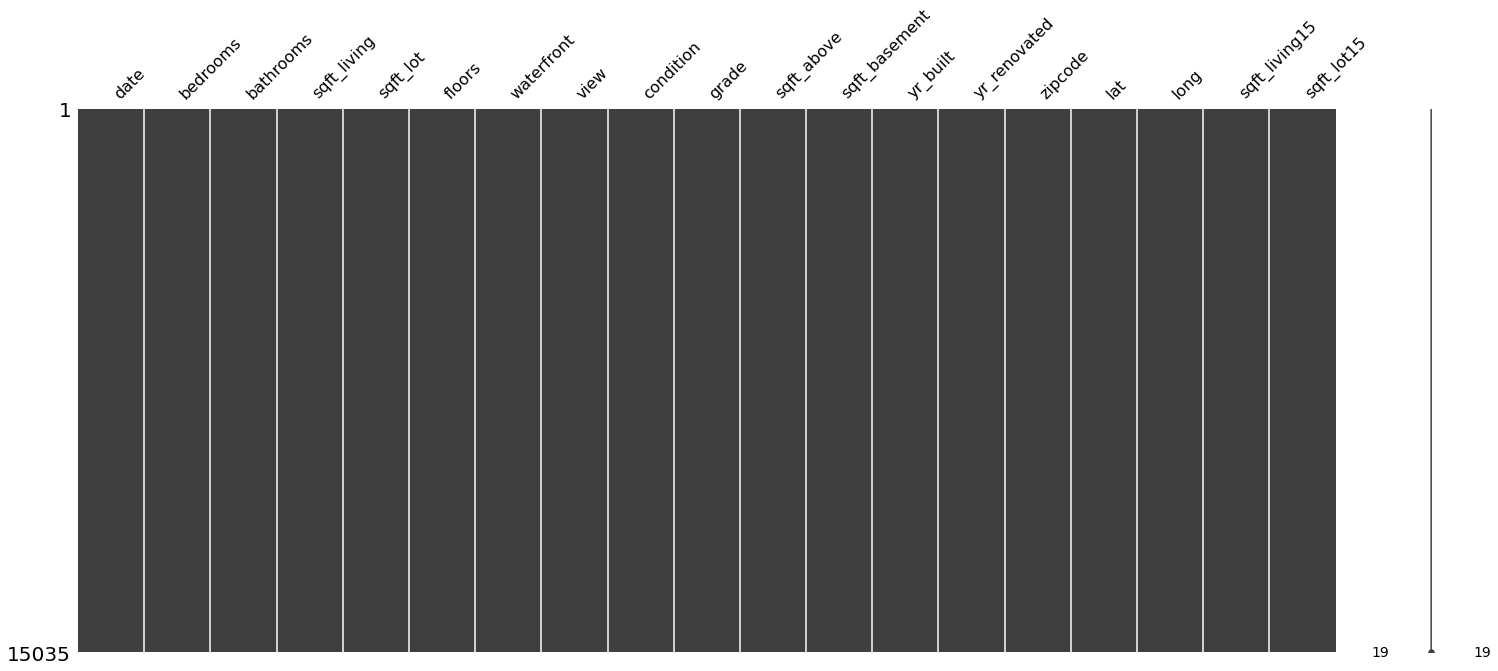

In [10]:
msno.matrix(train)

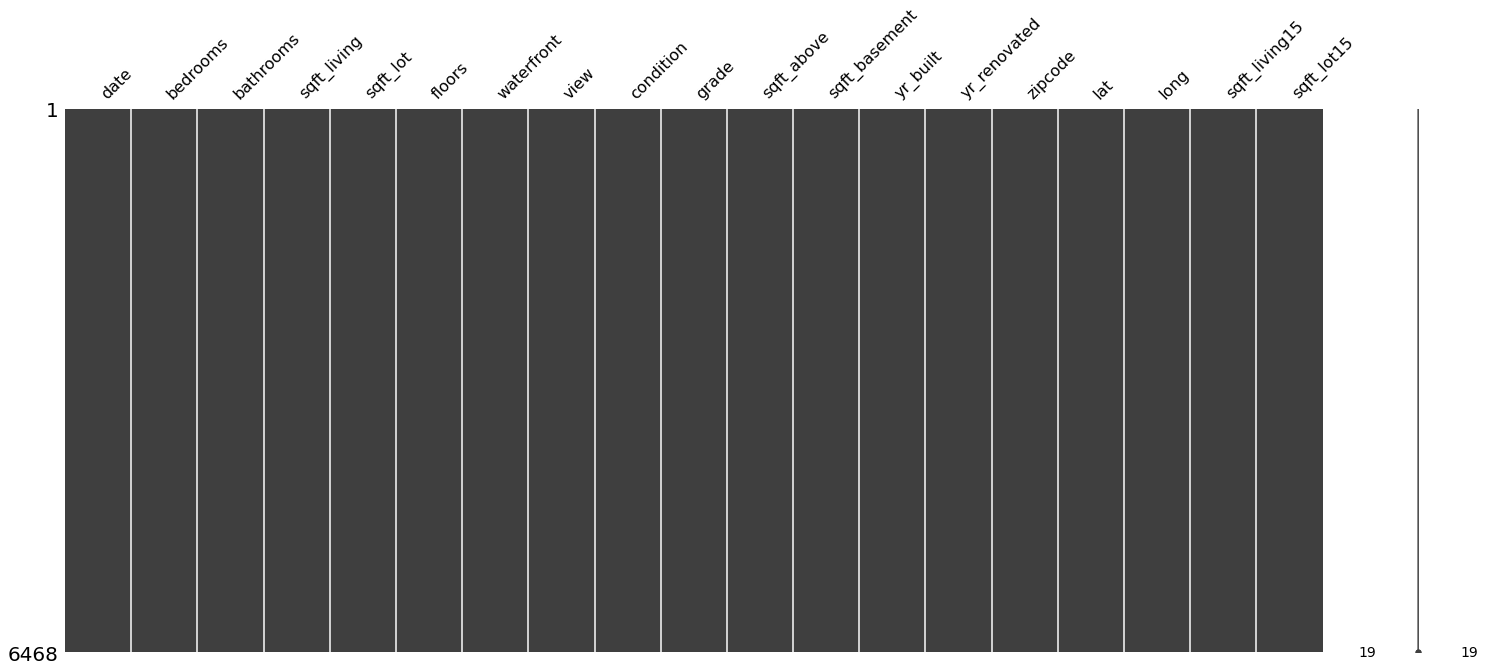

In [11]:
msno.matrix(test)

In [12]:
train.isna().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
test.isna().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

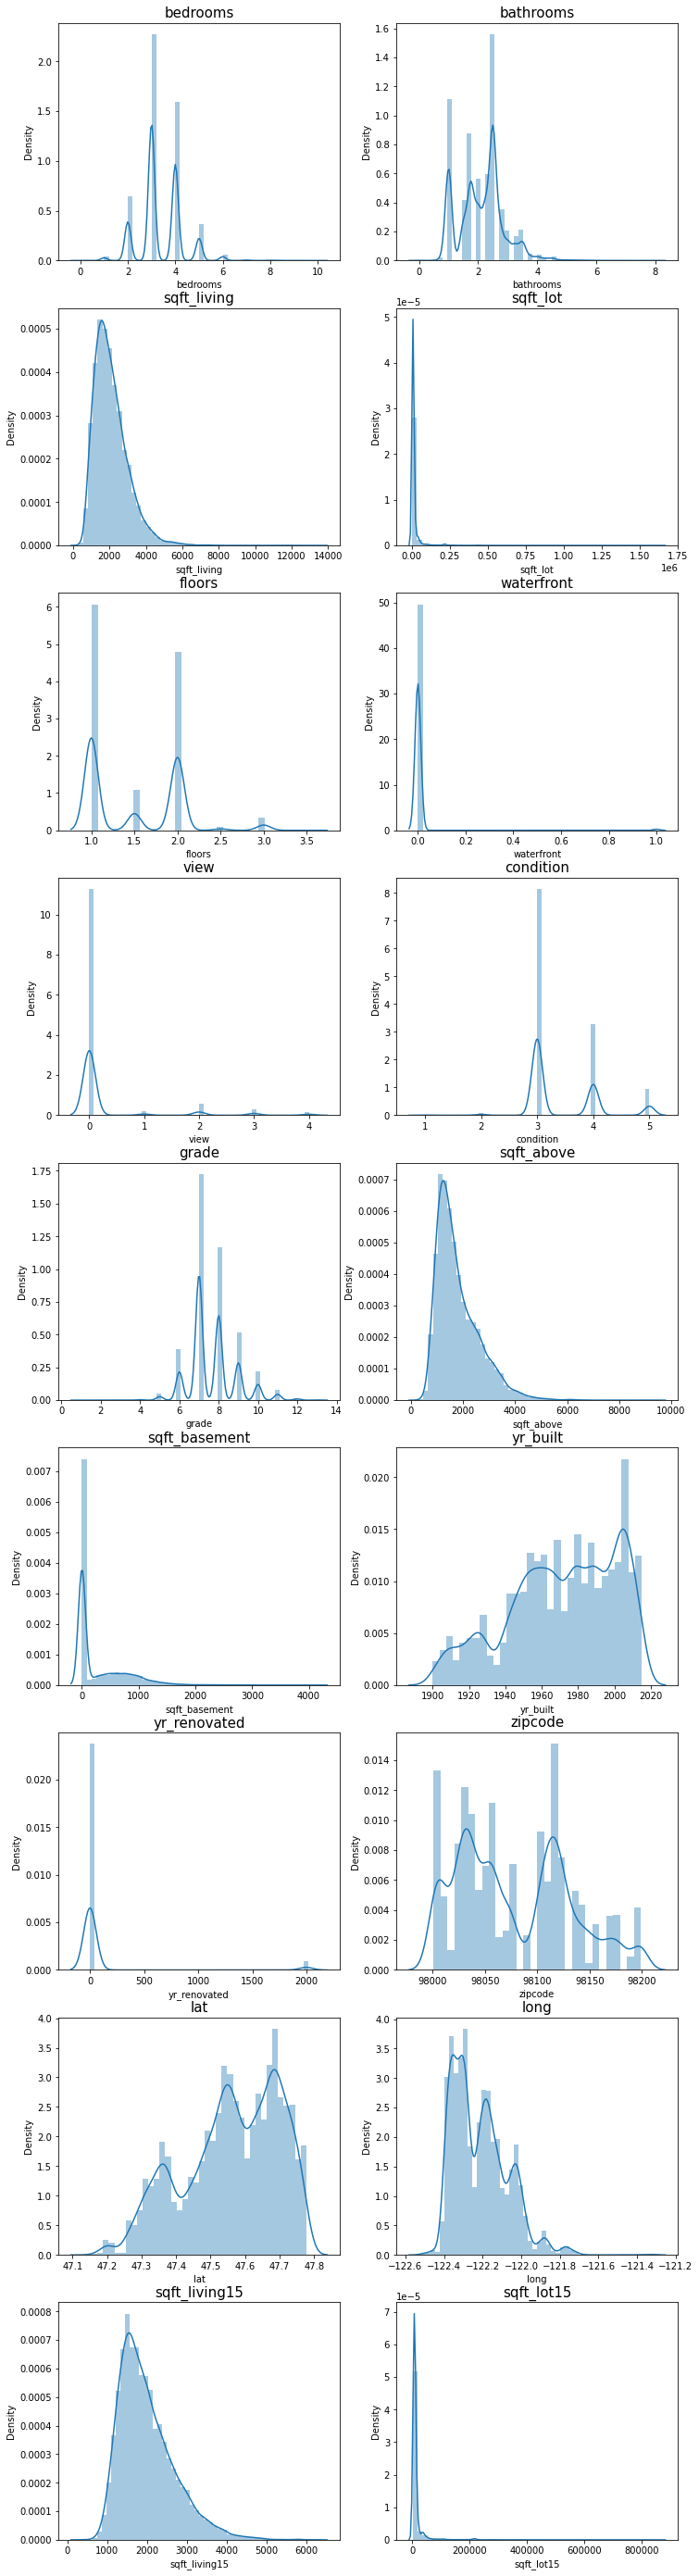

In [14]:
fig, ax = plt.subplots(9, 2, figsize=(12, 50))   

count = 1
columns = train.columns
for row in range(9):
    for col in range(2):
        sns.distplot(train[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

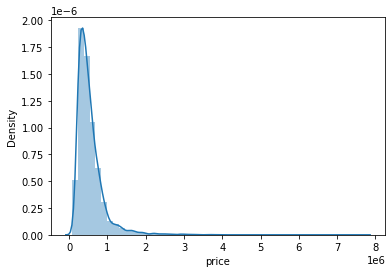

In [15]:
sns.distplot(y)
plt.show()

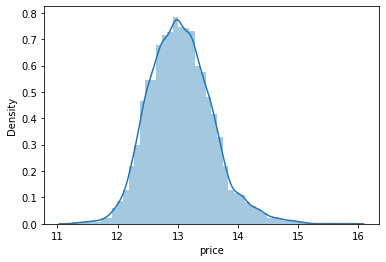

In [16]:
y_log = np.log1p(y)

sns.distplot(y_log)
plt.show()

In [17]:
y = np.log1p(y)
print(y)

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

def rmse(y_test, y_pred):
  return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

In [19]:
random_state = 2020    

xgboost = XGBRegressor(random_state = random_state)
lightgbm = LGBMRegressor(random_state = random_state)

In [20]:
model = LGBMRegressor(max_depth = 20, n_estimators=300, random_state=random_state)
model.fit(train, y)
prediction = model.predict(test)
prediction

array([13.12160458, 13.10226918, 14.15043868, ..., 13.05037436,
       12.67158278, 13.01735592])

In [21]:
prediction = np.expm1(prediction)
prediction

array([ 499619.74521686,  490052.17258291, 1397838.90879818, ...,
        465269.55869982,  318564.30877008,  450157.90324192])

In [22]:
submission = pd.read_csv('/content/drive/MyDrive/pic/sample_submission.csv')
submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


In [23]:
submission['price'] = prediction
submission.head()

,id,price
0,15035,4.996197e+05
1,15036,4.900522e+05
2,15037,1.397839e+06
3,15038,3.072446e+05
4,15039,3.279127e+05


In [24]:
submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format('/content/drive/MyDrive/pic', 'lgbm', '0.164399')
submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)

/content/drive/MyDrive/pic/submission_lgbm_RMSLE_0.164399.csv


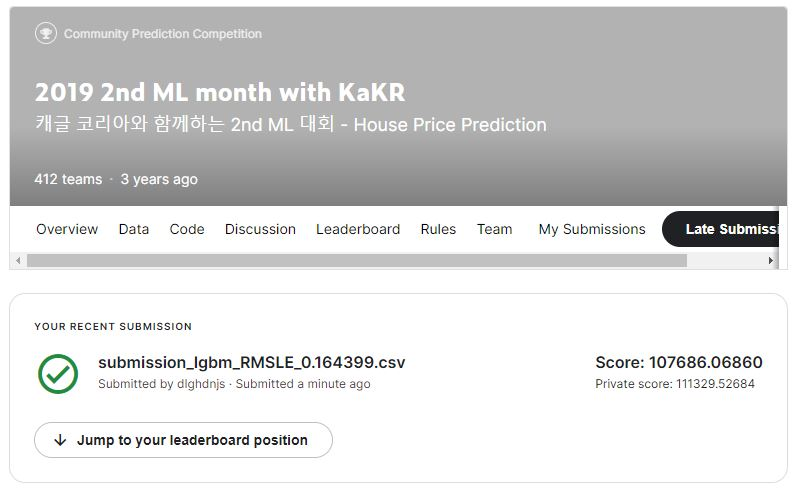

In [25]:
model2 = XGBRegressor(learning_rate= 0.1, max_depth = 6, n_estimators = 500, random_state=random_state)
model2.fit(train, y)

[07:47:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=6, n_estimators=500, random_state=2020)

In [26]:
prediction1 = model2.predict(test)
prediction1

array([13.200894, 12.944156, 14.111321, ..., 13.073161, 12.708693,
       13.040437], dtype=float32)

In [27]:
prediction1 = np.expm1(prediction1)
prediction1

array([ 540847.44,  418383.3 , 1344215.  , ...,  475993.28,  330608.28,
        460668.78], dtype=float32)

In [28]:
en1 = np.vstack([prediction, prediction1]).mean(0)

In [29]:
submission['price'] = en1
submission.head()

,id,price
0,15035,5.202336e+05
1,15036,4.542177e+05
2,15037,1.371027e+06
3,15038,3.008359e+05
4,15039,3.280043e+05


In [30]:
submission.to_csv('submission1.csv', index=False)

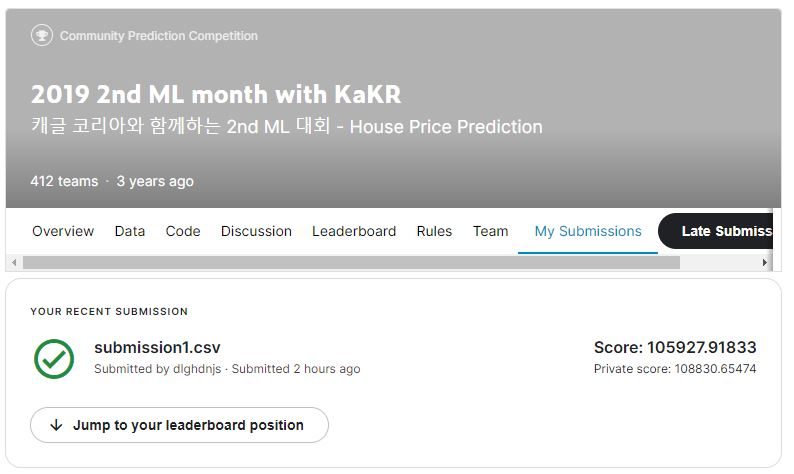

#더 좋은 성능을 내보자!

In [31]:
new_train = pd.read_csv('/content/drive/MyDrive/pic/train.csv')
new_test = pd.read_csv('/content/drive/MyDrive/pic/test.csv')

In [32]:
new_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [33]:
new_test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15035,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,15036,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,15037,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,15038,20150415T000000,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,15039,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [34]:
print('학습 데이터의 shape : ', new_train.shape)
print('\n 전체 피처의 type \n', new_train.dtypes.value_counts())

학습 데이터의 shape :  (15035, 21)

 전체 피처의 type 
 int64      15
float64     5
object      1
dtype: int64


In [35]:
print('테스트 데이터의 shape : ', new_test.shape)
print('\n 전체 피처의 type \n', new_test.dtypes.value_counts())

테스트 데이터의 shape :  (6468, 20)

 전체 피처의 type 
 int64      15
float64     4
object      1
dtype: int64


In [36]:
new_train.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [37]:
new_test.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [38]:
train_len = len(new_train)
data = pd.concat((new_train, new_test), axis=0)

print(len(data))

21503


In [39]:
data.drop(['id'], axis= 1, inplace = True)

print(data.columns)

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [40]:
data['year'] = data['date'].apply(lambda x : x[:4]).astype(int)
data['month'] = data['date'].apply(lambda x : x[4:6]).astype(int)
data['day'] = data['date'].apply(lambda x : x[6:8]).astype(int)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,...,1995,0,98003,47.3097,-122.327,2238,6819,2014,6,27
4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,...,1963,0,98198,47.4095,-122.315,1650,9711,2015,1,15


In [41]:
data.drop(['date'], axis= 1, inplace = True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
2,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
3,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,...,1995,0,98003,47.3097,-122.327,2238,6819,2014,6,27
4,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,...,1963,0,98198,47.4095,-122.315,1650,9711,2015,1,15


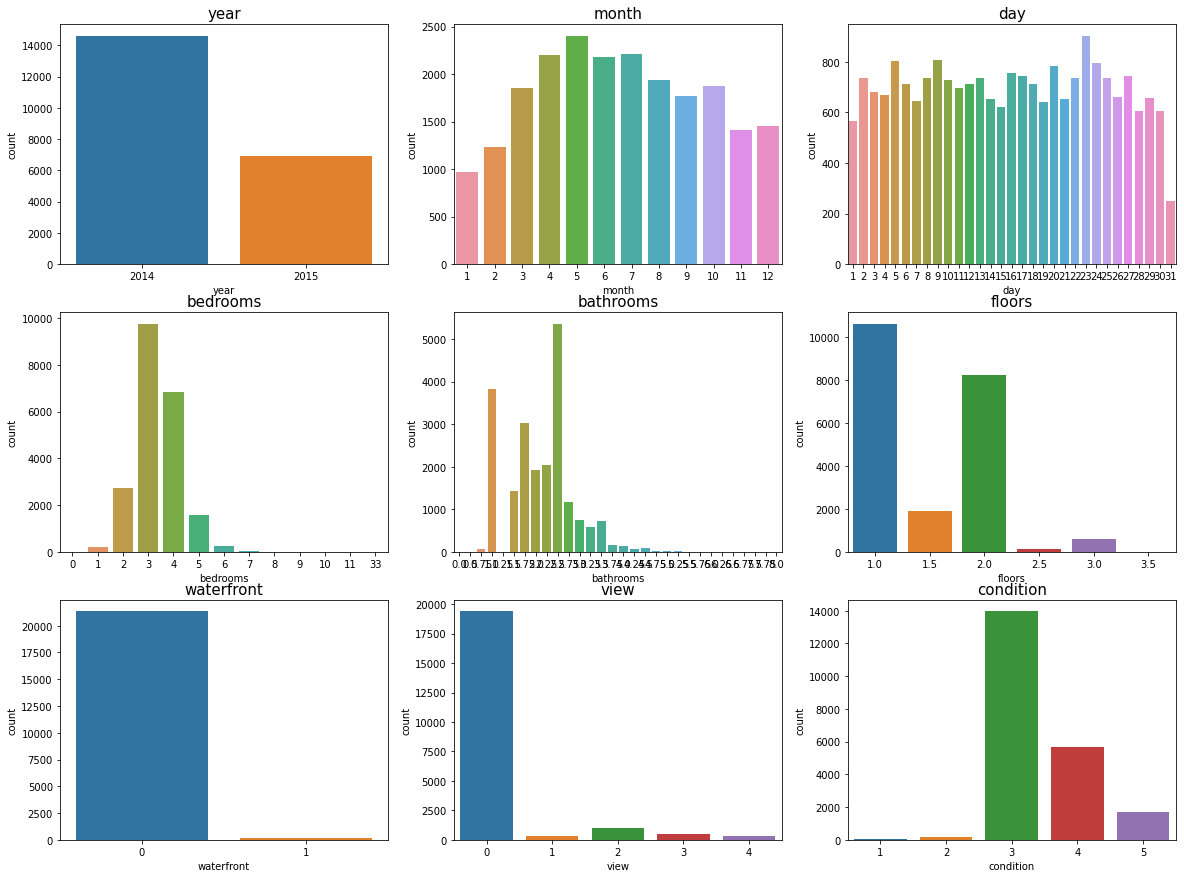

In [42]:
info = ['year', 'month', 'day', 'bedrooms', 'bathrooms', 'floors', 'waterfront',
        'view', 'condition', 'grade']

fig, ax = plt.subplots(3, 3, figsize=(20, 15))

count = 0
for row in range(3):
    for col in range(3):
        if count == 10:
            break
        sns.countplot(data[info[count]], ax=ax[row][col])
        ax[row][col].set_title(info[count], fontsize=15)
        count += 1

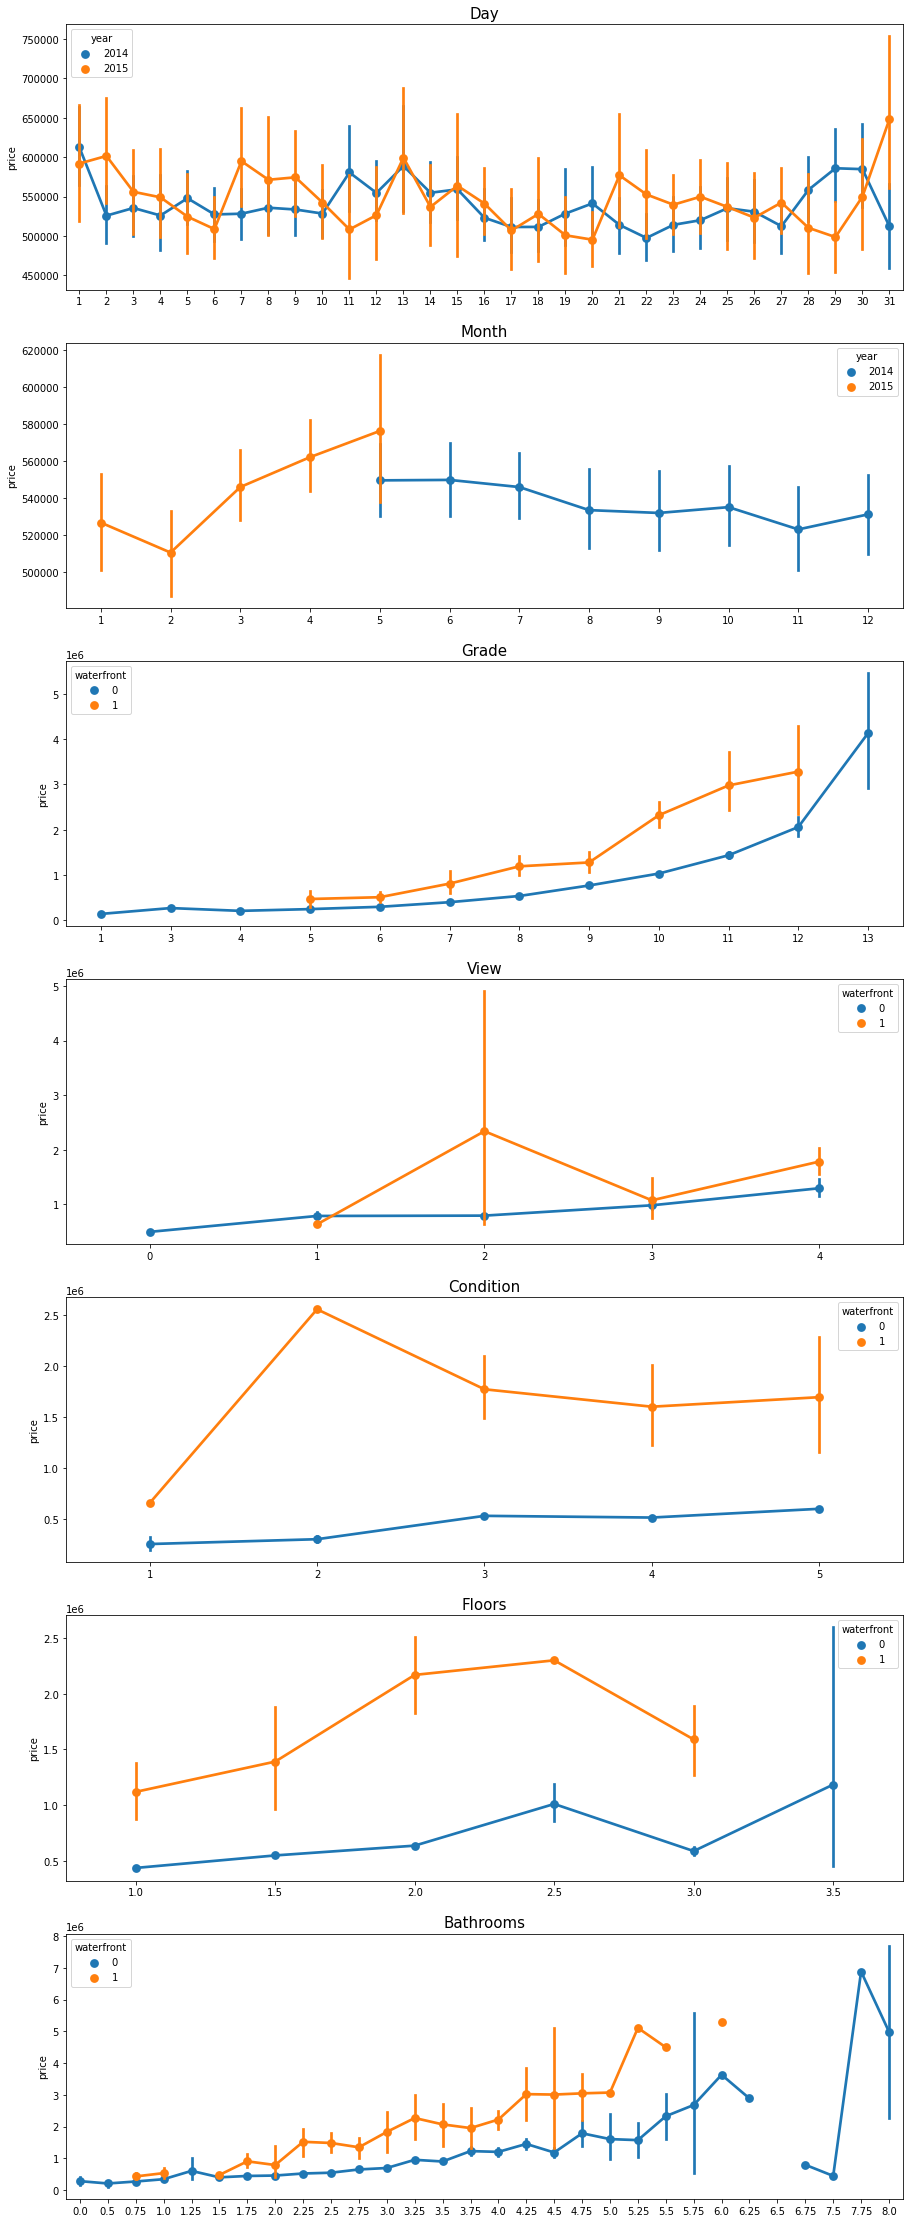

In [43]:
fig, axes = plt.subplots(7, figsize = (15, 40))

sns.pointplot(data = data, x = 'day', y = 'price', hue = 'year', ax = axes[0])
sns.pointplot(data = data, x = 'month', y = 'price', hue = 'year', ax = axes[1])
sns.pointplot(data = data, x = 'grade', y = 'price', hue = 'waterfront', ax = axes[2])
sns.pointplot(data = data, x = 'view', y = 'price', hue = 'waterfront', ax = axes[3])
sns.pointplot(data = data, x = 'condition', y = 'price', hue = 'waterfront', ax = axes[4])
sns.pointplot(data = data, x = 'floors', y = 'price', hue = 'waterfront', ax = axes[5])
sns.pointplot(data = data, x = 'bathrooms', y = 'price', hue = 'waterfront', ax = axes[6])

title = ['Day', 'Month', 'Grade', 'View', 'Condition', 'Floors', 'Bathrooms']

for i in range(7):
  axes[i].set_xlabel('')
  axes[i].set_title(title[i], fontsize = 15)
plt.show()

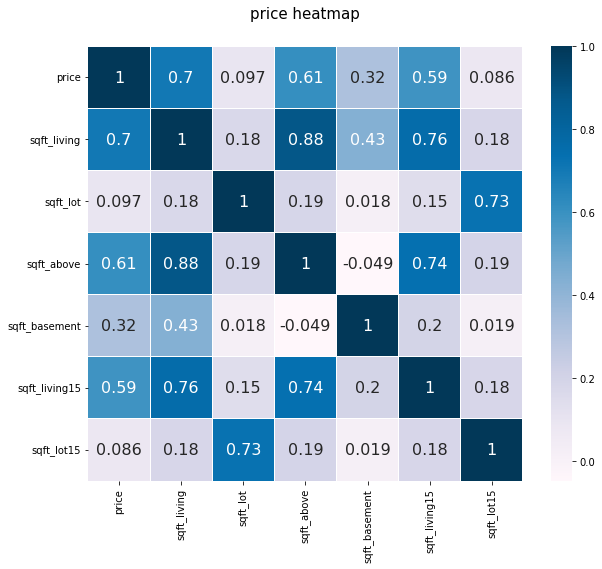

In [44]:
heatmap_data = new_train[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']]

colormap = plt.cm.PuBu 
plt.figure(figsize=(10, 8)) 
plt.title("price heatmap", y = 1.05, size = 15) 
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, 
            square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [45]:
y = new_train['price']

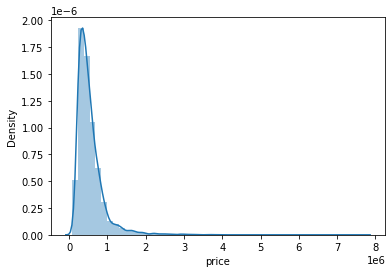

In [46]:
sns.distplot(y)
plt.show()

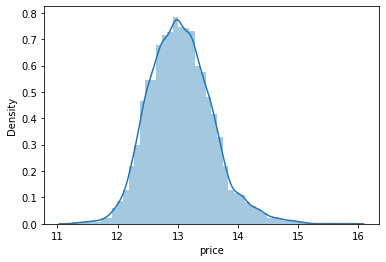

In [47]:
y_log = np.log1p(y)

sns.distplot(y_log)
plt.show()

In [48]:
y = np.log1p(y)
print(y)

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64


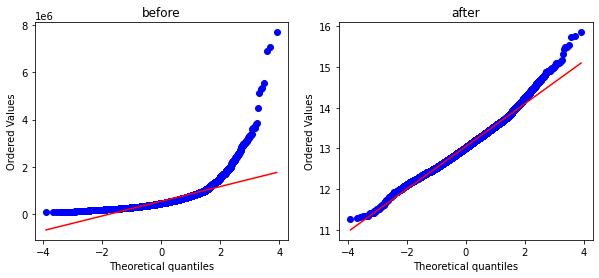

In [49]:
from scipy import stats

fig, axes = plt.subplots(ncols = 2, figsize = (10, 4))

reg = stats.probplot(new_train['price'], plot = axes[0])
axes[0].set_title('before')

reg = stats.probplot(np.log1p(new_train['price']), plot = axes[1])
axes[1].set_title('after')
plt.show()

In [50]:
import folium # for map visualization
from folium import plugins

house_map = folium.Map(location = [new_train['lat'].mean(), new_train['long'].mean()], zoom_start = 10)
lat_long_data = new_train[['lat', 'long']].values.tolist()
h_cluster = folium.plugins.FastMarkerCluster(lat_long_data).add_to(house_map)

house_map

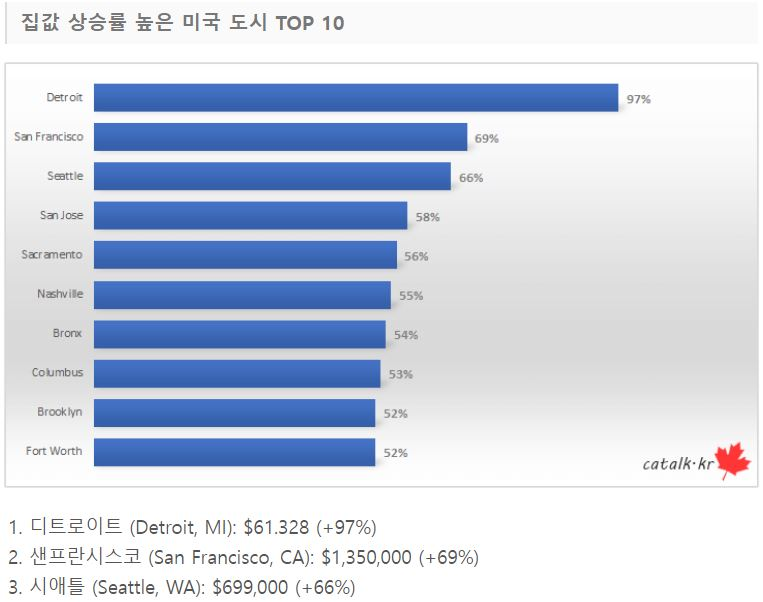

In [51]:
house_heatmap = folium.Map(location = [new_train['lat'].mean(), new_train['long'].mean()], zoom_start = 9)
house_heatmap.add_children(plugins.HeatMap([[row['lat'], row['long']] for name, row in new_train.iterrows()]))
house_heatmap

In [52]:
zipcode_data = new_train.groupby('zipcode').aggregate(np.mean)

In [53]:
zipcode_data.reset_index(inplace=True)

In [54]:
new_train['count'] = 1
count_house_zipcode = new_train.groupby('zipcode').sum()
count_house_zipcode.reset_index(inplace=True)
count_house_zipcode = count_house_zipcode[['zipcode', 'count']]
new_train.drop(['count'], axis = 1, inplace=True)

In [55]:
zipcode_data = zipcode_data.join(count_house_zipcode.set_index('zipcode'), on='zipcode')
zipcode_data.head()

,zipcode,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,count
0,98001,7887.037657,2.724696e+05,3.368201,1.987448,1841.079498,13400.485356,1.418410,0.000000,0.075314,...,7.238494,1655.472803,185.606695,1980.280335,49.682008,47.309264,-122.270138,1795.138075,10994.389121,239
1,98002,7944.885496,2.356645e+05,3.320611,1.828244,1648.625954,7352.977099,1.351145,0.000000,0.000000,...,6.702290,1531.557252,117.068702,1967.358779,60.488550,47.308214,-122.213122,1482.992366,7735.290076,131
2,98003,7123.243243,2.882156e+05,3.318919,2.021622,1872.789189,10698.886486,1.316216,0.000000,0.172973,...,7.513514,1618.286486,254.502703,1977.589189,0.000000,47.314029,-122.310562,1841.654054,9772.432432,185
3,98004,7636.516746,1.397283e+06,3.894737,2.571770,2997.583732,13424.593301,1.452153,0.004785,0.358852,...,8.846890,2506.913876,490.669856,1972.110048,220.057416,47.616382,-122.205455,2710.334928,12905.000000,209
4,98005,6271.626087,7.983833e+05,3.895652,2.428261,2665.913043,19577.400000,1.256522,0.000000,0.086957,...,8.443478,2108.086957,557.826087,1969.052174,52.260870,47.611151,-122.166852,2533.921739,18271.426087,115
